In [1]:
#!pip install tensorflow-gpu

In [2]:
#!pip install -U segmentation-models 

In [0]:
import sys 
import os
sys.path.append(os.path.abspath("/content/drive/My Drive/Ceramics_Seg/"))

In [4]:
import segmentation_models as sm
from tensorflow import keras
from datagenerator import DataGenerator

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [0]:
BACKBONE = 'resnet34'
#preprocess_input = sm.get_preprocessing(BACKBONE)

model = sm.Unet(BACKBONE, encoder_weights='imagenet', input_shape=(256,256,3), classes=2, encoder_freeze=True)
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

In [0]:
path_train = '/content/drive/My Drive/Ceramics_Seg/train'
path_train_a = '/content/drive/My Drive/Ceramics_Seg/trainannot'
gen = DataGenerator(path_train,path_train_a,image_size=(256,256), batch_size=20)


path_val = '/content/drive/My Drive/Ceramics_Seg/val'
path_val_a = '/content/drive/My Drive/Ceramics_Seg/valannot'
val_gen = DataGenerator(path_val,path_val_a,image_size=(256,256), batch_size=20)

In [13]:
history = model.fit_generator(gen, validation_data=val_gen, verbose=1, epochs=30)
model.save_weights('train_colab.h5')

Epoch 1/30
69/69 [==============================] - 190s 3s/step - loss: 0.0778 - iou_score: 0.9438 - val_loss: 0.1815 - val_iou_score: 0.8870
Epoch 2/30
69/69 [==============================] - 25s 359ms/step - loss: 0.0710 - iou_score: 0.9488 - val_loss: 0.1245 - val_iou_score: 0.9305
Epoch 3/30
69/69 [==============================] - 27s 392ms/step - loss: 0.0658 - iou_score: 0.9526 - val_loss: 0.0798 - val_iou_score: 0.9392
Epoch 4/30
69/69 [==============================] - 27s 388ms/step - loss: 0.0632 - iou_score: 0.9542 - val_loss: 0.0864 - val_iou_score: 0.9410
Epoch 5/30
69/69 [==============================] - 27s 388ms/step - loss: 0.0593 - iou_score: 0.9569 - val_loss: 0.0877 - val_iou_score: 0.9284
Epoch 6/30
69/69 [==============================] - 27s 390ms/step - loss: 0.0605 - iou_score: 0.9563 - val_loss: 0.0764 - val_iou_score: 0.9499
Epoch 7/30
69/69 [==============================] - 27s 387ms/step - loss: 0.0561 - iou_score: 0.9588 - val_loss: 0.0984 - val_iou_s

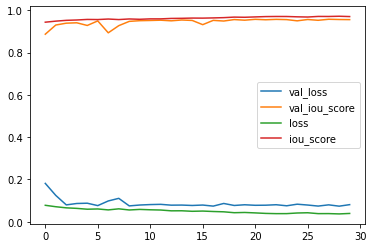

In [14]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [0]:
from segmentation_utils import merge_prediction_and_input

In [0]:
 path = '/content/drive/My Drive/Ceramics_Seg/test'
 files = ["{p}/{f}".format(p=path, f=file)
                      for file in os.listdir(path) if file.lower().endswith(('png','jpg'))]

In [0]:
import matplotlib.pyplot as plt 

1/1 [==============================] - 0s 19ms/step


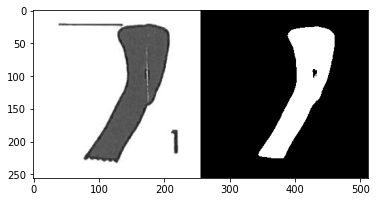

In [77]:
plt.imshow(merge_prediction_and_input(model,files[22], (256,256)), cmap='gray')